In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib.ticker as plticker

plt.rcParams['figure.dpi'] = 200

import os
import pandas as pd
from pathlib import Path
import numpy as np

# from Chapter4.TemporalAbstraction import NumericalAbstraction
from Chapter4.FrequencyAbstraction import FourierTransformation

In [53]:
def plot_frequencies(data_table, columns, match='like', display='line',size='',title=''):
    plt.xlabel('xlabel', fontsize=0.5)

    point_displays = ['+', 'x']
    line_displays = ['-']

    names = list(data_table.columns)

    f, xar = plt.subplots(len(columns), sharex=True, sharey=False,clear=True)
    f.set_figwidth(10)
    
    if title != '':
        f.suptitle(title)

    # x-axis as time
    # xfmt = md.DateFormatter('%H:%M') 

    xar[0].set_prop_cycle(color=[plt.get_cmap('Pastel1')(0)])
    xar[1].set_prop_cycle(color=[plt.get_cmap('Pastel1')(1)])
    xar[2].set_prop_cycle(color=[plt.get_cmap('Pastel1')(2)])
    xar[3].set_prop_cycle(color=[plt.get_cmap('Set1')(1),plt.get_cmap('Set1')(2),plt.get_cmap('Set1')(3),plt.get_cmap('Set1')(4),plt.get_cmap('Set1')(6)])

    # Pass through the columns specified.
    for i in range(0, len(columns)):
        # xar[i].xaxis.set_major_formatter(xfmt)
        
        if match[i] == 'exact':
            relevant_cols = [columns[i]]
        elif match[i] == 'like':
            relevant_cols = [name for name in names if columns[i] == name[0:len(columns[i])]]
        else:
            raise ValueError("Match should be 'exact' or 'like' for " + str(i) + ".")

        max_values = []
        min_values = []

        # Pass through the relevant columns.
        for j in range(0, len(relevant_cols)):
            # Create a mask to ignore the NaN and Inf values when plotting:
            mask = data_table[relevant_cols[j]].replace([np.inf, -np.inf], np.nan).notnull()
            max_values.append(data_table[relevant_cols[j]][mask].max())
            min_values.append(data_table[relevant_cols[j]][mask].min())

            # Display point, or as a line
            if display[i] == 'points':
                xar[i].plot(data_table.index[mask], data_table[relevant_cols[j]][mask],
                            point_displays[j%len(point_displays)])
            else:
                xar[i].plot(data_table.index[mask], data_table[relevant_cols[j]][mask],
                            line_displays[j%len(line_displays)],linewidth="0.2")

        xar[i].tick_params(axis='y', labelsize=7)

        xar[i].yaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
        xar[3].yaxis.set_major_locator( plticker.MultipleLocator(base=1.0))        
        
        xar[i].legend(relevant_cols, fontsize='xx-small', numpoints=1, loc='upper center',
                        bbox_to_anchor=(0.5, 1.4), ncol=len(relevant_cols), fancybox=False, shadow=False)

        xar[i].set_ylim([min(min_values) - 0.1*(max(max_values) - min(min_values)),
                            max(max_values) + 0.1*(max(max_values) - min(min_values))])

    
    xar[3].set_ylim([0.5,1.5])

    xar[0].set_ylabel('highest amplitud frequency')
    xar[0].yaxis.set_label_coords(-.05, -1)
    
    # Make sure we get a nice figure with only a single x-axis and labels there.
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    plt.xlabel('timestamp (ms)')

    xar[0].xaxis.set_label_coords(.9, -.1)

    # set the spacing between subplots
    plt.subplots_adjust(hspace=0.6)
    #turn interative mode off
    # plt.ioff()
    
    plt.linewidth=15

    f.patch.set_facecolor('xkcd:white')

    # return f
    return plt.figure()


In [17]:
dataset = pd.read_csv("./A3_dataset/COMBINED.csv")
# dataset.index = pd.to_datetime(dataset['YYYY-MO-DD HH-MI-SS_SSS'],format='%Y-%m-%d %H:%M:%S:%f')

dataset = dataset.rename(columns={"ACCELEROMETER X (m/s²)": "acc_x"})
dataset = dataset.rename(columns={"ACCELEROMETER Y (m/s²)": "acc_y"})
dataset = dataset.rename(columns={"ACCELEROMETER Z (m/s²)": "acc_z"})


dataset = dataset.rename(columns={"GRAVITY X (m/s²)": "grav_x"})
dataset = dataset.rename(columns={"GRAVITY Y (m/s²)": "grav_y"})
dataset = dataset.rename(columns={"GRAVITY Z (m/s²)": "grav_z"})

dataset = dataset.rename(columns={"LINEAR ACCELERATION X (m/s²)": "linear_acc_x"})
dataset = dataset.rename(columns={"LINEAR ACCELERATION Y (m/s²)": "linear_accy_x"})
dataset = dataset.rename(columns={"LINEAR ACCELERATION Z (m/s²)": "linear_acc_z"})

dataset = dataset.rename(columns={"GYROSCOPE X (rad/s)": "gyro_x"})
dataset = dataset.rename(columns={"GYROSCOPE Y (rad/s)": "gyro_y"})
dataset = dataset.rename(columns={"GYROSCOPE Z (rad/s)": "gyro_z"})

for label in dataset.activity.unique():
    # dataset["label-" + label] = (1 if dataset['activity'] == label else 0)
    dataset["label-" + label] = dataset.apply(lambda row: (1 if row.activity==label else 0),axis =1)


# milliseconds_per_instance = (dataset['Timestamps (ms)'][1] - dataset['Timestamps (ms)'][0])
milliseconds_per_instance = 500 # approx 500ms between instances

fs = float(1000)/milliseconds_per_instance        ##  fs = sampling rate (wut???)
ws = int(float(10000)/milliseconds_per_instance)  ##  ws = window size

# NumAbs = NumericalAbstraction()
FreqAbs = FourierTransformation()

print("fs= ",fs)
print("ws= ",ws)

fs=  2.0
ws=  20


In [19]:
dataset.head()

,acc_x,acc_y,acc_z,grav_x,grav_y,grav_z,linear_acc_x,linear_accy_x,linear_acc_z,gyro_x,...,activity,label-jogging,label-cycling,label-football,label-jumprope,label-pushups,label-sitting,label-swimming,label-tennis,label-walking
0,5.0087,3.5865,6.0478,3.0025,4.0308,8.4207,2.0062,-0.4442,-2.3730,-1.5828,...,jogging,1,0,0,0,0,0,0,0,0
1,3.0957,5.5929,18.5479,1.8939,2.9892,9.1459,1.2018,2.6037,9.4019,-0.0641,...,jogging,1,0,0,0,0,0,0,0,0
2,13.5871,-21.6699,0.7638,9.2328,3.1869,-0.8776,22.8759,-0.5101,20.9578,5.5827,...,jogging,1,0,0,0,0,0,0,0,0
3,31.3640,-5.3798,14.5974,8.4778,-1.9642,-4.5211,4.7023,23.7443,25.2070,6.3249,...,jogging,1,0,0,0,0,0,0,0,0
4,-2.3296,22.6611,21.1600,8.3773,-2.7779,-4.2748,1.3718,25.8676,28.1546,0.1894,...,jogging,1,0,0,0,0,0,0,0,0


In [21]:
# dataset = dataset.head(55960)
# dataset = dataset.head(55980)
dataset = FreqAbs.abstract_frequency(dataset, ['acc_x'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['acc_y'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['acc_z'], ws, fs)

In [65]:
dataset

,acc_x,acc_y,acc_z,grav_x,grav_y,grav_z,linear_acc_x,linear_accy_x,linear_acc_z,gyro_x,...,activity,label-jogging,label-cycling,label-football,label-jumprope,label-pushups,label-sitting,label-swimming,label-tennis,label-walking
0,5.0087,3.5865,6.0478,3.0025,4.0308,8.4207,2.0062,-0.4442,-2.3730,-1.5828,...,jogging,True,False,False,False,False,False,False,False,False
1,3.0957,5.5929,18.5479,1.8939,2.9892,9.1459,1.2018,2.6037,9.4019,-0.0641,...,jogging,True,False,False,False,False,False,False,False,False
2,13.5871,-21.6699,0.7638,9.2328,3.1869,-0.8776,22.8759,-0.5101,20.9578,5.5827,...,jogging,True,False,False,False,False,False,False,False,False
3,31.3640,-5.3798,14.5974,8.4778,-1.9642,-4.5211,4.7023,23.7443,25.2070,6.3249,...,jogging,True,False,False,False,False,False,False,False,False
4,-2.3296,22.6611,21.1600,8.3773,-2.7779,-4.2748,1.3718,25.8676,28.1546,0.1894,...,jogging,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55955,-2.4981,4.3077,8.3988,-1.8359,3.9292,8.7955,-0.5764,0.7967,-1.2228,-0.5392,...,walking,False,False,False,False,False,False,False,False,True
55956,-0.6260,3.7451,7.8984,-0.4181,4.9875,8.4333,-0.5197,-1.8844,0.2011,0.2756,...,walking,False,False,False,False,False,False,False,False,True
55957,3.5578,4.9552,9.0344,1.2485,5.9374,7.7045,0.8653,-0.9992,1.2886,0.5947,...,walking,False,False,False,False,False,False,False,False,True
55958,1.6854,4.9457,8.1126,0.7843,5.0623,8.3623,1.3046,0.1330,-0.4811,-0.2625,...,walking,False,False,False,False,False,False,False,False,True


<Figure size 900x600 with 0 Axes>

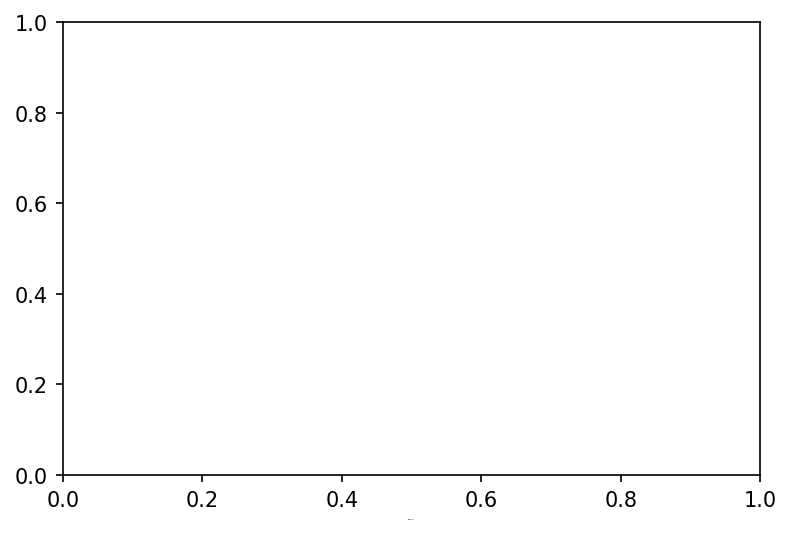

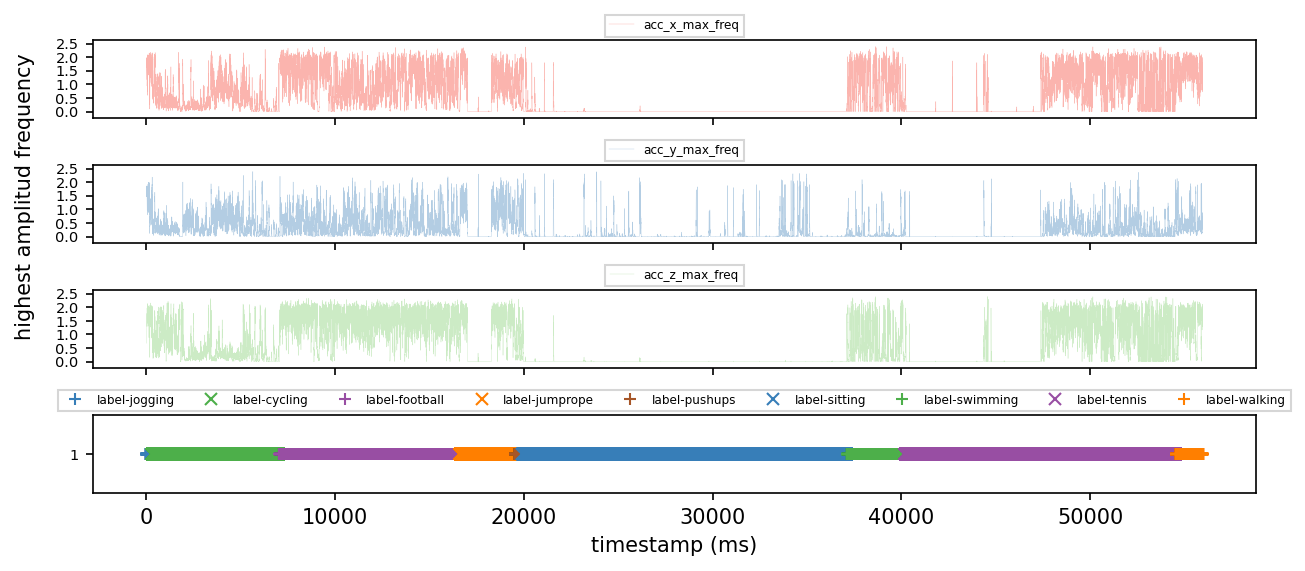

<Figure size 900x600 with 0 Axes>

In [54]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
# plot_frequencies(dataset, ['acc_x_max_freq', 'acc_y_max_freq', 'acc_z_max_freq'], ['like','like', 'like'], ['line','line', 'line'],title="")
plot_frequencies(dataset, ['acc_x_max_freq', 'acc_y_max_freq', 'acc_z_max_freq','label-'], ['like','like', 'like', 'like'], ['line','line', 'line', 'points'],title="")

